## Implement Logistic Regression

#### Import required dependecies

In [37]:
import numpy as np                               #for numerical operations
import matplotlib.pyplot as plt                  #for data visualisation
from sklearn.datasets import load_breast_cancer  #load data from scikit learn datasets
from sklearn.preprocessing import StandardScaler #for scaling the input data

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')


In [38]:
x, y = load_breast_cancer(return_X_y= True)      #load data from scikit learn datasets

In [39]:
#scaled input data
stdScaler = StandardScaler()  
stdScaler.fit(x)
x = stdScaler.transform(x)


In [40]:
x_b = np.c_[np.ones((x.shape[0], 1)), x]         #add bias x0 = 1
y = y.reshape(-1, 1)

In [41]:
theta = np.random.rand(x_b.shape[1], 1)                     #initiate random theta
n_iteration = 10000                                         #number of iterations
eta = 0.05                                                  #learning rate
for i in range(n_iteration):                                #iterate over number of iteration
    z = x_b.dot(theta)                                      #calculate prediction
    sigmoid = 1/(1 + np.exp(-z))                            #calculate sigmoid
    gradient = x_b.T.dot(sigmoid - y)/x.shape[0]            #calculate gradient
    theta -= eta * gradient                                 #calculate best theta


In [42]:
z = x_b.dot(theta)                                      #multiply best theta with input value
y_predict = 1/(1 + np.exp(-z))                          #calculate sigmoid
y_predict = y_predict[np.where(y_predict > 0.5)]        #get only value which have predicted value greter than 0.5                   


### Plot decision boundry

In [43]:
x_values = np.array([min(x_b[:,2]) -1, max(x_b[:, 2]) + 1])

In [44]:
y_values = -(theta[0] + theta[1] * x_values) / theta[2]

Text(0.5, 1.0, 'Decision Boundry of Logistic Regression on Breast Cancer Dataset')

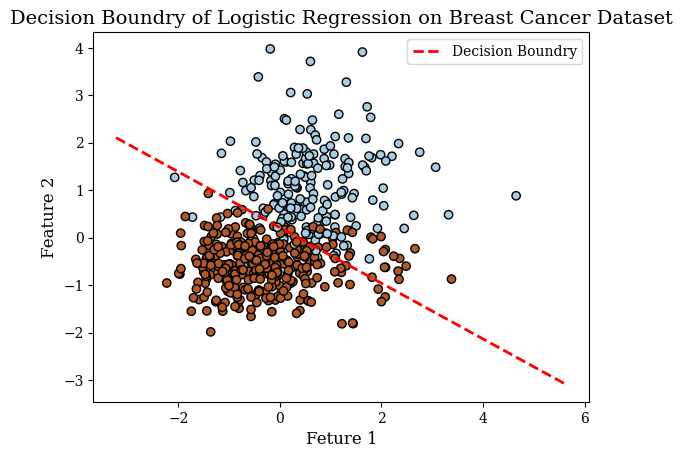

In [45]:
plt.scatter(x[:,1], x[:, 2],c = y, cmap = plt.cm.Paired, edgecolors= 'k')
plt.plot(x_values, y_values, 'r--',label = 'Decision Boundry')
plt.xlabel('Feture 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundry of Logistic Regression on Breast Cancer Dataset')